# U.S. Medical Insurance Costs

In [141]:
# Importing  Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import trim_mean
from matplotlib import pyplot as plt

In [142]:
# Importing data 
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [143]:
# Checking if our dataset contains any null value 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [144]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [145]:
# Categorising our data 
bmi = df["bmi"]
cond_list = [bmi < 18.5, bmi < 25, bmi < 30, bmi >= 30]
choice_list = ["Underweight", "Healthy", "Overweight", "Obese"]
df["bmi_category"] = np.select(cond_list, choice_list)

age=df['age']
condition_list=[age<=25, age<=40, age<=60, age>60]
choice_list = ["0-25", "26-40", "41-60", "60+"]
df["age_group"] = np.select(condition_list, choice_list)

charges=df['charges']
condition_list=[charges<10000,charges<20000,charges<30000,charges>30000]
choice_list = ["0 - 10k $", "10k - 20k $", "20k - 30k $", ">30k"]
df["charges_range"] = np.select(condition_list, choice_list)

In [146]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category,age_group,charges_range
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,0-25,10k - 20k $
1,18,male,33.770,1,no,southeast,1725.55230,Obese,0-25,0 - 10k $
2,28,male,33.000,3,no,southeast,4449.46200,Obese,26-40,0 - 10k $
3,33,male,22.705,0,no,northwest,21984.47061,Healthy,26-40,20k - 30k $
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,26-40,0 - 10k $


There are people from 4 different region ['southwest' 'southeast' 'northwest' 'northeast'], 
and by the looks for it, the Ratio of people from each region is almost similar: 
southeast    27.2%
southwest    24.3%
northwest    24.3%
northeast    24.2%
Name: region, dtype: object 


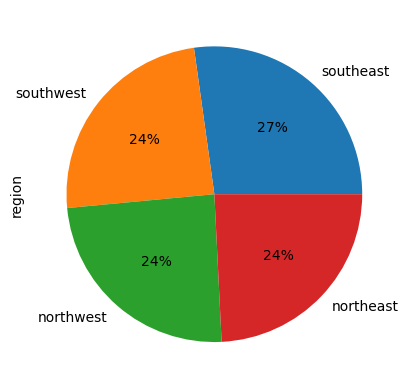

In [147]:
#  What is the distribution of each of the data columns (histograms/pie charts)?

print(f'''There are people from 4 different region {df.region.unique()}, 
and by the looks for it, the Ratio of people from each region is almost similar: 
{df['region'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'} ''')

df['region'].value_counts().round(2).plot(kind='pie', autopct='%1d%%')
plt.show()

0-25     22.9%
26-40    29.5%
41-60    40.8%
60+       6.8%
Name: age_group, dtype: object


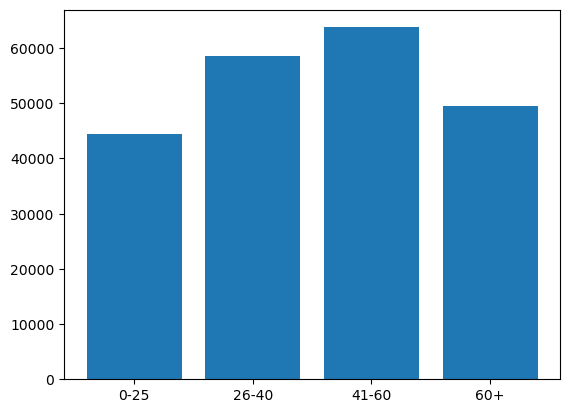

As age increases, insurance cost also increase.


In [148]:
# Analysing if age and charges are correlated 
print(df['age_group'].value_counts(normalize=True)[df.age_group.unique()].mul(100).round(1).astype(str) + '%')

plt.bar(df['age_group'],df['charges'])
plt.show()

print('As age increases, insurance cost also increase.')

In [149]:
# Q2) [DONE] How each of the 6 factors (age, sex, bmi, children, smoker, region) affects charges?
# Q3) [DONE] Which age group pays more charges on average?
# Q4) [DONE] Is smoking correlated with bmi or age?
# Q5) [DONE] What is the average age in each of the regions?
# Q6) [DONE] Which region is most populous in this dataset?
# Q7) [DONE] What is the minimum and maximum number of children?
# Q8) What could be biased in the dataset?

In [152]:
# Insurance cost for smokers 
df.groupby('smoker').charges.mean().round(2)

smoker
no      8434.27
yes    32050.23
Name: charges, dtype: float64

   children       charges
0         0  12365.975602
1         1  12731.171832
2         2  15073.563734
3         3  15355.318367
4         4  13850.656311
5         5   8786.035247


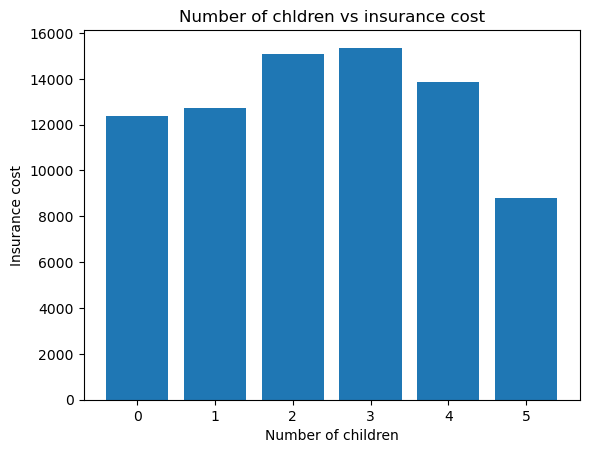

In [170]:
# Avg cost of Insurance based on the number of children
insurance_cost_based_on_children=df.groupby(['children']).charges.mean().reset_index()
print(insurance_cost_based_on_children)

list_of_charges=insurance_cost_based_on_children.values.tolist()
charges_list=[]
for i in range(len(list_of_charges)):
    charges_list.append(list_of_charges[i][1])

plt.bar(range(len(charges_list)), charges_list)
# sns.barplot(x="children", y="charges", data = df)
plt.title('Number of chldren vs insurance cost')
plt.xlabel('Number of children')
plt.ylabel('Insurance cost')
plt.show()

In [166]:
# Avg insurance cost in different region 
df.groupby(['region']).charges.mean().round(2).sort_values(ascending=False)

region
southeast    14735.41
northeast    13406.38
northwest    12417.58
southwest    12346.94
Name: charges, dtype: float64

In [167]:
# Avg insurance cost in based on age group
df.groupby(['age_group']).charges.mean().round(2).sort_values(ascending=False)

age_group
60+      21063.16
41-60    15888.76
26-40    11096.68
0-25      9087.02
Name: charges, dtype: float64

In [168]:
# Insurance cost based on Sex 
df.groupby(['sex']).charges.mean().round(2).sort_values(ascending=False)

sex
male      13956.75
female    12569.58
Name: charges, dtype: float64

In [169]:
# Insurance cost based on BMI Categ
df.groupby(['bmi_category']).charges.mean().round(2).sort_values(ascending=False)

bmi_category
Obese          15552.34
Overweight     10987.51
Healthy        10409.34
Underweight     8852.20
Name: charges, dtype: float64

In [ ]:
# 